<a id='top'></a>
## Can Amazon Reviews Help Businesses Learn their Best Customers? 

#### Contributors: Muoyo Okome

<p><img src='https://github.com/muoyo/amazon-reviews/blob/master/images/wordcloud.png?raw=true' align='left'>

<a id='toc'></a>
### Table of Contents
1. [Problem Statement](#problemstatement)
2. [Data Sources](#datasources)
3. [Data Cleaning](#datacleaning)
4. [Classification Analysis](#classification)  
    - [Logistic Regression](#logisticregression)
    - [K Nearest Neighbors](#kneighbors)
    - [Decision Trees](#decisiontrees)
    - [Bagged Trees](#baggedtrees)
    - [Random Forest](#randomforest)
    - [Adaboost](#adaboost)
    - [Gradient Boost](#gradientboost)
    - [Improved Results through Count Vectorization](#countvectorization)
5. [Vizualizations](#visualizations)
6. [Recommendations & Next Steps](#recommendations)

In [28]:
# Import necessary libraries
import pickle
import warnings
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='problemstatement'></a>
### Problem Statement

**Can Amazon Reviews Help Businesses Learn their Best Customers?**

The key question we look to answer is whether knowing the text of an Amazon Customer Review can help us predict the star rating of that review.

Our goal is to eventually improve our process to a level where it can be deployed on customer conversations anywhere to help businesses identify customers most likely to love or hate their products based on the things they are saying.

[Back to Top ↑](#top)

<a id='datasources'></a>
### Data Sources

#### **[AWS Open Data: Amazon Customer Reviews Dataset](https://registry.opendata.aws/amazon:reviews/)**

- Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. Over 130+ million customer reviews are available to researchers as part of this dataset.

- A collection of reviews written in the Amazon.com marketplace and associated metadata from 1995 until 2015. This is intended to facilitate study into the properties (and the evolution) of customer reviews potentially including how people evaluate and express their experiences with respect to products at scale. (130M+ customer reviews) 

<br> 

[Back to Top ↑](#top)

In [20]:
# Import python files we've created to help
%run ../python_files/nlp
%run ../python_files/data_cleaning
%run ../python_files/classification
%run ../python_files/visualizations

In [21]:
# Read in original data
df_full = pd.read_csv('https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz', sep='\t', error_bad_lines=False, warn_bad_lines=False)

In [22]:
# dfs = {}

In [15]:
# cat_list = [
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_DVD_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Toys_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Tools_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Software_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Shoes_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz',
#     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Outdoors_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Music_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Major_Appliances_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Kitchen_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Jewelry_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Improvement_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Camera_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_02.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_01.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Baby_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz',
# #     'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz'
# ]


# for cat_link in cat_list:
#     dfs[cat_link] = pd.read_csv(cat_link, sep='\t', error_bad_lines=False, warn_bad_lines=True)
#     print(cat_link, dfs[cat_link].shape)

In [16]:
# for cat_link in dfs:
#     print(cat_link)
#     dfs[cat_link] = dfs[cat_link][dfs[cat_link].star_rating != 3]
#     dfs[cat_link]['review_class'] = ((dfs[cat_link]['star_rating'] == 4) | (dfs[cat_link]['star_rating'] == 5)).astype(int)
#     dfs[cat_link] = clean_data(dfs[cat_link])
#     dfs[cat_link] = append_sentiment_scores(dfs[cat_link])
#     print(dfs[cat_link].head())

In [17]:
# display(len(dfs['https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz']))

In [18]:
# dfs.keys()

In [ ]:
"""Train a convolutional neural network text classifier on the
IMDB dataset, using the TextCategorizer component. The dataset will be loaded
automatically via Thinc's built-in dataset loader. The model is added to
spacy.pipeline, and predictions are available via `doc.cats`. For more details,
see the documentation:
* Training: https://spacy.io/usage/training
Compatible with: spaCy v2.0.0+
"""
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import thinc.extra.datasets

import spacy
from spacy.util import minibatch, compounding


@plac.annotations(
    model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_texts=("Number of texts to train from", "option", "t", int),
    n_iter=("Number of training iterations", "option", "n", int),
    init_tok2vec=("Pretrained tok2vec weights", "option", "t2v", Path),
)
def main(model=None, output_dir=None, n_iter=20, n_texts=2000, init_tok2vec=None):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()

    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # add the text classifier to the pipeline if it doesn't exist
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "textcat" not in nlp.pipe_names:
        textcat = nlp.create_pipe(
            "textcat", config={"exclusive_classes": True, "architecture": "simple_cnn"}
        )
        nlp.add_pipe(textcat, last=True)
    # otherwise, get it, so we can add labels to it
    else:
        textcat = nlp.get_pipe("textcat")

    # add label to text classifier
    textcat.add_label("POSITIVE")
    textcat.add_label("NEGATIVE")

    # load the IMDB dataset
    print("Loading IMDB data...")
    (train_texts, train_cats), (dev_texts, dev_cats) = load_data()
    train_texts = train_texts[:n_texts]
    train_cats = train_cats[:n_texts]
    print(
        "Using {} examples ({} training, {} evaluation)".format(
            n_texts, len(train_texts), len(dev_texts)
        )
    )
    train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))

    # get names of other pipes to disable them during training
    pipe_exceptions = ["textcat", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train textcat
        optimizer = nlp.begin_training()
        if init_tok2vec is not None:
            with init_tok2vec.open("rb") as file_:
                textcat.model.tok2vec.from_bytes(file_.read())
        print("Training the model...")
        print("{:^5}\t{:^5}\t{:^5}\t{:^5}".format("LOSS", "P", "R", "F"))
        batch_sizes = compounding(4.0, 32.0, 1.001)
        for i in range(n_iter):
            losses = {}
            # batch up the examples using spaCy's minibatch
            random.shuffle(train_data)
            batches = minibatch(train_data, size=batch_sizes)
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)
            with textcat.model.use_params(optimizer.averages):
                # evaluate on the dev data split off in load_data()
                scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
            print(
                "{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}".format(  # print a simple table
                    losses["textcat"],
                    scores["textcat_p"],
                    scores["textcat_r"],
                    scores["textcat_f"],
                )
            )

    # test the trained model
    test_text = "This movie sucked"
    doc = nlp(test_text)
    print(test_text, doc.cats)

    if output_dir is not None:
        with nlp.use_params(optimizer.averages):
            nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        doc2 = nlp2(test_text)
        print(test_text, doc2.cats)


def load_data(limit=0, split=0.8):
    """Load data from the IMDB dataset."""
    # Partition off part of the train data for evaluation
    train_data, _ = thinc.extra.datasets.imdb()
    random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])


def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 0.0  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 0.0  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if label == "NEGATIVE":
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.0
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.0
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    if (precision + recall) == 0:
        f_score = 0.0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"textcat_p": precision, "textcat_r": recall, "textcat_f": f_score}


if __name__ == "__main__":
    plac.call(main)

In [12]:
# Before we can begin cleaning and preprocessing our text data, we need to make some decisions about things such as:

# Do we remove stop words or not?
# Do we stem or lemmatize our text data, or leave the words as is?
# Is basic tokenization enough, or do we need to support special edge cases through the use of regex?
# Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?
# Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?
# What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? 
# More advanced vectorization strategies such as Word2Vec?

In [13]:
# STOPWORDS

# Get all the english stopwords from nltk
# Get all of the punctuation from string.punctuation, and convert it to a list
# Add the two lists together. Name the result stopwords_list
# Create another list containing various types of empty strings and ellipses, such as ["''", '""', '...', '``']. 
# Add this to our stopwords_list, so that we won't have tokens that are only empty quotes and such

In [ ]:
# TOKENIZATION

# Next, let's try tokenizing our dataset. In order to save ourselves some time, we'll write a function to clean our dataset, 
# and then use Python's built-in map() function to clean every article in the dataset at the same time.

# In the cell below, complete the process_article() function. This function should:

# Take in one parameter, article
# Tokenize the article using the appropriate function from nltk
# Lowercase every token, remove any stopwords found in stopwords_list from the tokenized article, and return the results


In [ ]:
# VOCABULARY

# Now, let's move onto exploring the dataset a bit more. Let's start by getting the total vocabulary size of the training dataset. 
# We can do this by creating a set object and then using it's .update() method to iteratively add each article. Since it's a set, 
# it will only contain unique words, with no duplicates.

# In the cell below:

# Create a set() object called total_vocab
# Iterate through each tokenized article in processed_data and add it to the set using the set's .update() method
# Once all articles have been added, get the total number of unique words in our training set by taking the length of the set


In [ ]:
# Vectorizing with TF-IDF

# Import TfidfVectorizer from sklearn.feature_extraction.text and instantiate TfidfVectorizer()
# Call the vectorizer object's .fit_transform() method and pass in our data as input. Store the results in tf_idf_data_train
# Also create a vectorized version of our testing data, which can be found in newsgroups_test.data. Store the results in tf_idf_data_test.
# NOTE: When transforming the test data, use the .transform() method, not the .fit_transform() method, as the vectorizer has already been fit to the training data.

In [ ]:
# Modeling Our Data

# Great! We've now preprocessed and explored our dataset, let's take a second to see what our data looks like in vectorized form.

# In the cell below:

# Instantiate MultinomialNB() and RandomForestClassifier(). For random forest, set n_estimators to 100. Don't worry about tweaking any of the other parameters
# Fit each to our vectorized training data
# Create predictions for our training and test sets
# Calculate the accuracy_score() for both the training and test sets (you'll find our training labels stored within the variable target, 
#                                                                     and the test labels stored within newsgroups_test.target)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [62]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm


# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [63]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [64]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [65]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [66]:
from sklearn.model_selection import train_test_split

X = df_full['review_fulltext'] # the features we want to analyze
ylabels = df_full['review_class'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [67]:
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x11d936690>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 toke...u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x11cd64680>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
             

In [68]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.941160002572571
Logistic Regression Precision: 0.9533711570294859
Logistic Regression Recall: 0.9781455291766372


In [ ]:
# clf_lr_spacy = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', penalty='l2')
# clf_lr_spacy.fit(X_train_resampled, y_train_resampled)

# y_hat_lr_train = clf_lr.predict(X_train_resampled)
# print(classification_report(y_train_resampled, y_hat_lr_train))
# show_confusion_matrix(clf_lr, X_train_resampled, y_train_resampled, title='Logistic Regression - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.86      0.74      0.80     41169
           1       0.95      0.98      0.97    223158

    accuracy                           0.94    264327
   macro avg       0.91      0.86      0.88    264327
weighted avg       0.94      0.94      0.94    264327



ValueError: could not convert string to float: "Still wear every day. Bought this over a year and a half ago, only thing I had a problem with is I scraped it against cement (my fault).<br /><br />Band is still strong and clock ticks perfectly - one of the best buys I've had on amazon."

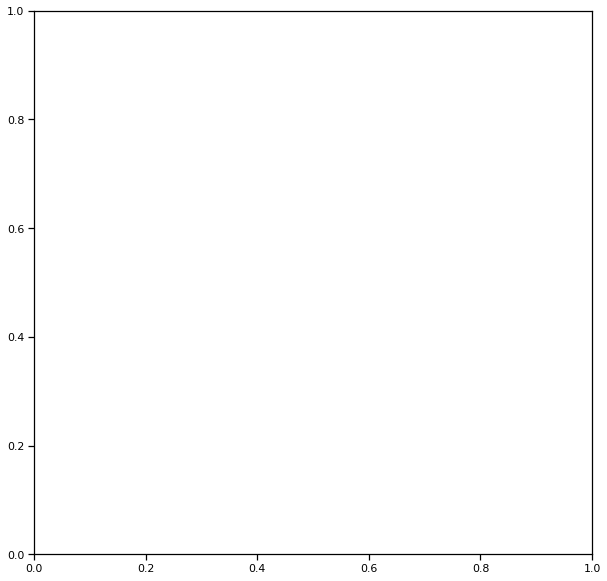

In [75]:
# y_hat_lr_test = clf_lr.predict(X_test_numeric)
print(classification_report(y_test, predicted))
show_confusion_matrix(pipe.named_steps['classifier'], X_test, y_test, title='Logistic Regression - Test Set (Normalized)');

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<a id='datacleaning'></a>
### Data Cleaning

In preparation for our analysis, in addition to dealing with missing values and limiting our scope to the columns of interest, we also used [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner) to give us positive, negative, neutral, and compound sentiment scores for each review in our dataset.

To make the project more modular and easier to follow & build upon, we created separate .py files to handle the heavy lifting for tasks such as data extraction & cleaning, visualizations, and natural language processing.

We chose to focus on the Watches category (~960,000 customer reviews) for this analysis, though with sufficient time, the process can be generalized to all 130 million rows of the dataset.

In [ ]:
# Clean data & load into final dataframe

In [23]:
df_full = df_full[df_full.star_rating != 3]
df_full['review_class'] = ((df_full['star_rating'] == 4) | (df_full['star_rating'] == 5)).astype(int)

In [25]:
df = clean_data(df_full)

In [40]:
# df_full.customer_id.value_counts()

In [41]:
# df_full.loc[df_full.customer_id == 40765068]

In [42]:
# df_full.loc[df_full.customer_id == 42418272]

In [29]:
# df = append_sentiment_scores(df)

In [ ]:
df = append_sentiment_scores2(df)

In [ ]:
df

In [30]:
# pickle.dump( df, open( "../models/save.df", "wb" ) )
df = pickle.load( open( "../models/save.df", "rb" ))



[Back to Top ↑](#top)

<a id='classification'></a>
### Classification Analysis

With the help of the scikit-learn package, our next step was to run a series of classification models, each time with the goal of using insight gained from the review text, to predict the number of stars in the review's star rating.

- **Dependent variable:** **star_rating:** The 1-5 star rating of the review. <p>

- **Independendent variables:**
    - **review_fulltext** serves as the underlying data for all of our independent variables.<br>
    It is made up of the **review_title** and **review_body** appended together.
    
    From the **review_fulltext** we calculated 4 sentiment scores which we used as our variables.
        - **neg:** Review's 'negative' rating via VADER Sentiment Analysis.
        - **neu:** Review's 'neutral' rating via VADER Sentiment Analysis.
        - **pos:** Review's 'positive' rating via VADER Sentiment Analysis.
        - **compound:** Review's 'compound' rating via VADER Sentiment Analysis.

To guard against data leakage, we split our dataset into training data and test data.

In [31]:
df.shape

(881088, 21)

In [32]:
X_train, X_test, y_train, y_test = get_train_test_split(df, test_size=.25)

Looking at our data, it's clear that the classes present are not naturally balanced, which one might expect.

In [33]:
y_train.value_counts()

1    557775
0    103041
Name: review_class, dtype: int64

In [34]:
def wordcount(sentence):
    return len(sentence.split())

In [35]:
# X_train.review_fulltext.map(wordcount).mean()

We leveraged SMOTE to deal with this unbalanced class issue.

In [36]:
# smote = SMOTE()

X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# X_train_resampled, y_train_resampled = smote.fit_sample(X_train_numeric, y_train) 

In [37]:
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids()
# X_train_resampled, y_train_resampled = cc.fit_resample(X_train_numeric, y_train)

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_numeric, y_train)

In [ ]:
# X_train_resampled = X_train_numeric
# y_train_resampled = y_train

In [ ]:
y_train_resampled.value_counts()

With newly balanced classes for our analysis, we ran a series of classification models against our data with varying results. For each model, we display a classification report and confusion matrix for training and test sets to quickly understand the 

Our Decision Trees and K Nearest Neighbors were the models best at explaining our training data. However, performance against our test data showed that in most cases our models still had significant room for improvement, with overfitting often being the culprit (for some random samples overfitting was much less of an issue, but it did often occur). Going forward this is something we will look to improve our models by addressing this problem.



[Back to Top ↑](#top)

<a id='logisticregression'></a>
### Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.83      0.84    103041
           1       0.83      0.85      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.84      0.84      0.84    206082
weighted avg       0.84      0.84      0.84    206082



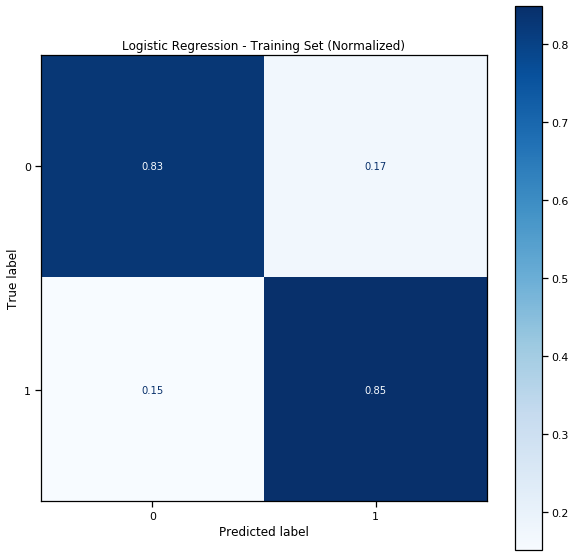

In [39]:
clf_lr = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', penalty='l2')
clf_lr.fit(X_train_resampled, y_train_resampled)

y_hat_lr_train = clf_lr.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_lr_train))
show_confusion_matrix(clf_lr, X_train_resampled, y_train_resampled, title='Logistic Regression - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.50      0.82      0.62     34093
           1       0.96      0.85      0.90    186179

    accuracy                           0.85    220272
   macro avg       0.73      0.84      0.76    220272
weighted avg       0.89      0.85      0.86    220272



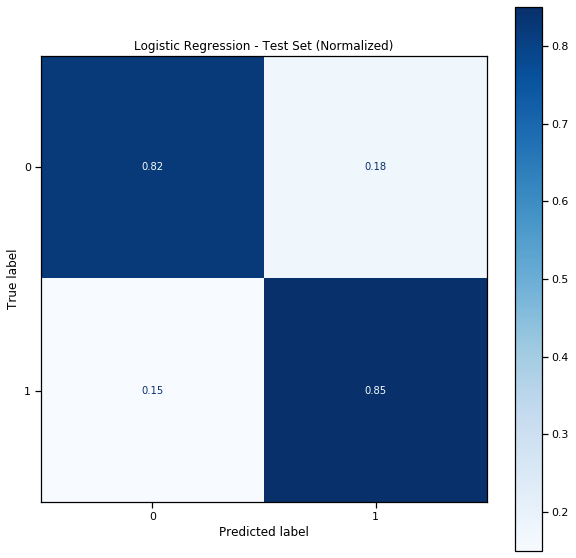

In [40]:
y_hat_lr_test = clf_lr.predict(X_test_numeric)
print(classification_report(y_test, y_hat_lr_test))
show_confusion_matrix(clf_lr, X_test_numeric, y_test, title='Logistic Regression - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='naivebayes'></a>
### Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.79      0.82    103041
           1       0.81      0.87      0.84    103041

    accuracy                           0.83    206082
   macro avg       0.83      0.83      0.83    206082
weighted avg       0.83      0.83      0.83    206082



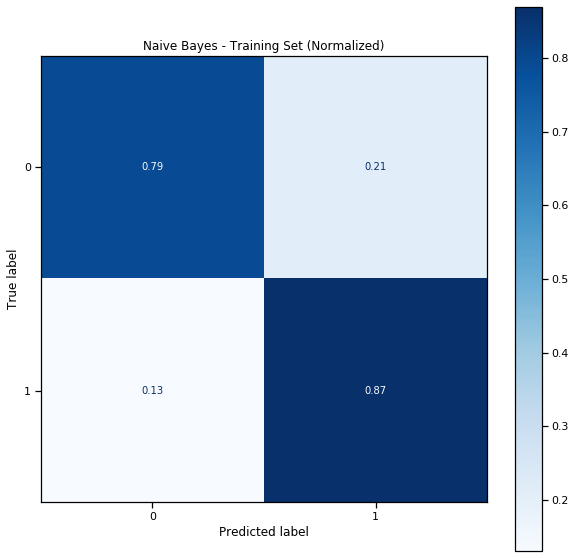

In [41]:
clf_nb = GaussianNB()
clf_nb.fit(X_train_resampled, y_train_resampled)

y_hat_nb_train = clf_nb.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_nb_train))
show_confusion_matrix(clf_nb, X_train_resampled, y_train_resampled, title='Naive Bayes - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.53      0.79      0.63     34093
           1       0.96      0.87      0.91    186179

    accuracy                           0.86    220272
   macro avg       0.74      0.83      0.77    220272
weighted avg       0.89      0.86      0.87    220272



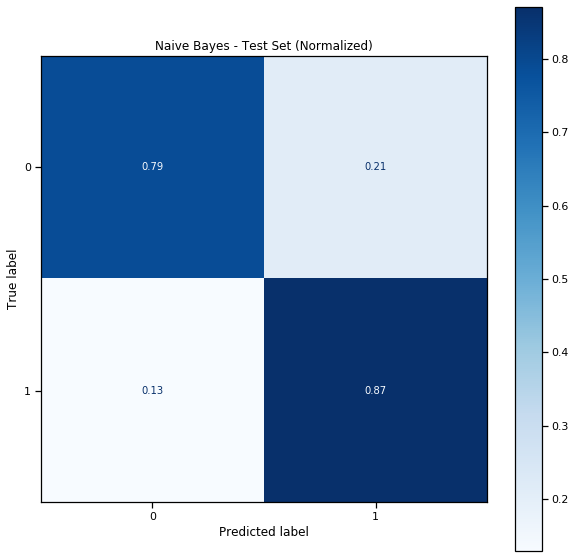

In [42]:
y_hat_nb_test = clf_nb.predict(X_test_numeric)
print(classification_report(y_test, y_hat_nb_test))
show_confusion_matrix(clf_nb, X_test_numeric, y_test, title='Naive Bayes - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='kneighbors'></a>
### K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    103041
           1       0.88      0.84      0.86    103041

    accuracy                           0.87    206082
   macro avg       0.87      0.87      0.87    206082
weighted avg       0.87      0.87      0.87    206082



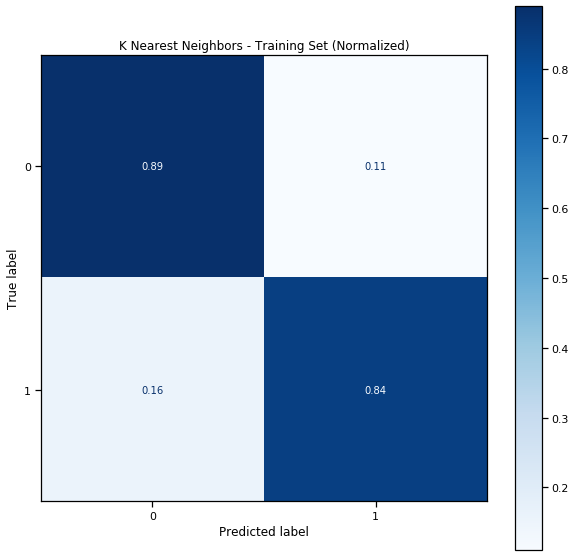

In [43]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_resampled, y_train_resampled)

y_hat_knn_train = clf_knn.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_knn_train))
show_confusion_matrix(clf_knn, X_train_resampled, y_train_resampled, title='K Nearest Neighbors - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.44      0.85      0.58     34093
           1       0.97      0.80      0.88    186179

    accuracy                           0.81    220272
   macro avg       0.70      0.83      0.73    220272
weighted avg       0.89      0.81      0.83    220272



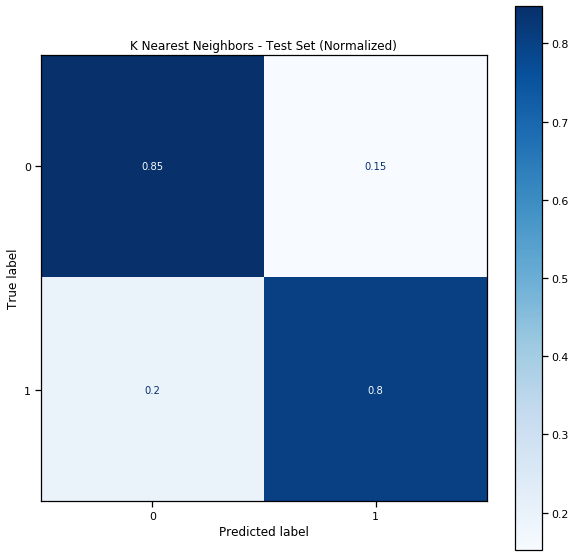

In [44]:
y_hat_knn_test = clf_knn.predict(X_test_numeric)
print(classification_report(y_test, y_hat_knn_test))
show_confusion_matrix(clf_knn, X_test_numeric, y_test, title='K Nearest Neighbors - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#decisiontrees'></a>
### Decision Trees

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    103041
           1       0.98      0.94      0.96    103041

    accuracy                           0.96    206082
   macro avg       0.96      0.96      0.96    206082
weighted avg       0.96      0.96      0.96    206082



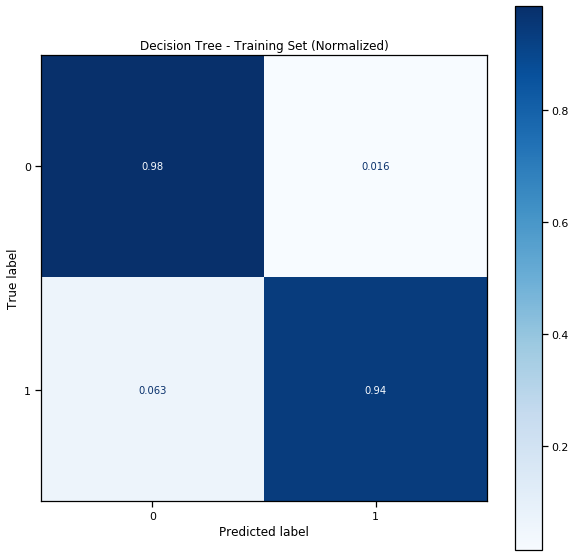

In [45]:
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt.fit(X_train_resampled, y_train_resampled)

y_hat_dt_train = clf_dt.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_dt_train))
show_confusion_matrix(clf_dt, X_train_resampled, y_train_resampled, title='Decision Tree - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.40      0.81      0.53     34093
           1       0.96      0.77      0.86    186179

    accuracy                           0.78    220272
   macro avg       0.68      0.79      0.69    220272
weighted avg       0.87      0.78      0.80    220272



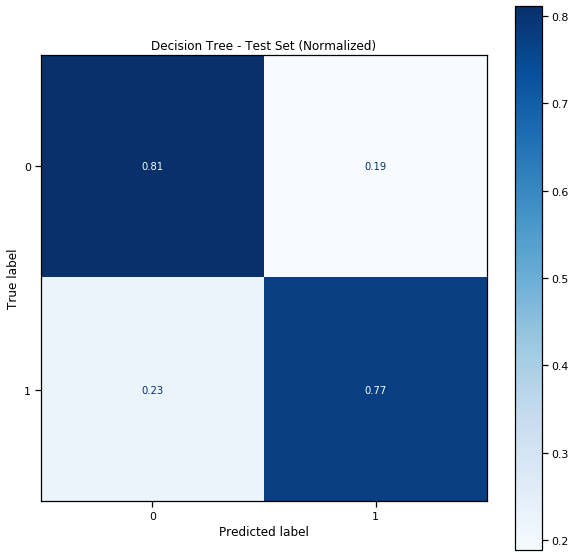

In [46]:
y_hat_dt_test = clf_dt.predict(X_test_numeric)
print(classification_report(y_test, y_hat_dt_test))
show_confusion_matrix(clf_dt, X_test_numeric, y_test, title='Decision Tree - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='#baggedtrees'></a>
### Bagged Trees

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    103041
           1       0.87      0.82      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.85      0.84      0.84    206082
weighted avg       0.85      0.84      0.84    206082



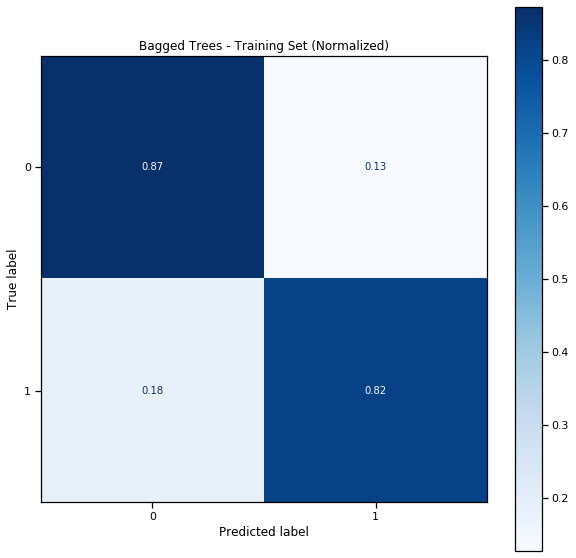

In [47]:
clf_bagged = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_leaf_nodes=100), 
                                 n_estimators=20)
clf_bagged.fit(X_train_resampled, y_train_resampled)

y_hat_bagged_train = clf_bagged.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_bagged_train))
show_confusion_matrix(clf_bagged, X_train_resampled, y_train_resampled, title='Bagged Trees - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.87      0.60     34093
           1       0.97      0.82      0.89    186179

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.82      0.84    220272



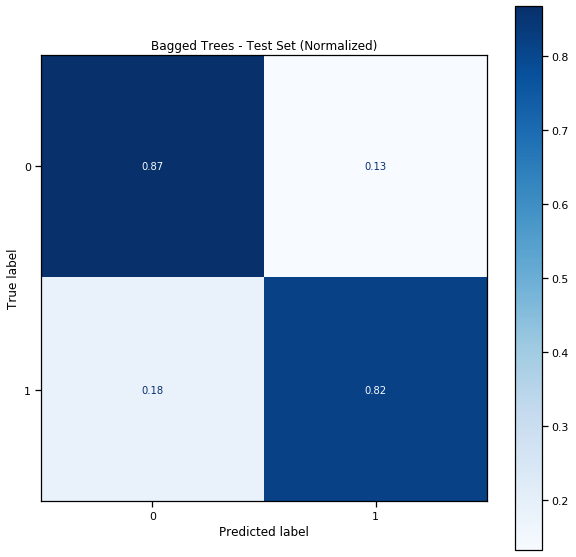

In [48]:
y_hat_bagged_test = clf_bagged.predict(X_test_numeric)
print(classification_report(y_test, y_hat_bagged_test))
show_confusion_matrix(clf_bagged, X_test_numeric, y_test, title='Bagged Trees - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='randomforest'></a>
### Random Forest

              precision    recall  f1-score   support

           0       0.86      0.91      0.89    103041
           1       0.90      0.85      0.88    103041

    accuracy                           0.88    206082
   macro avg       0.88      0.88      0.88    206082
weighted avg       0.88      0.88      0.88    206082



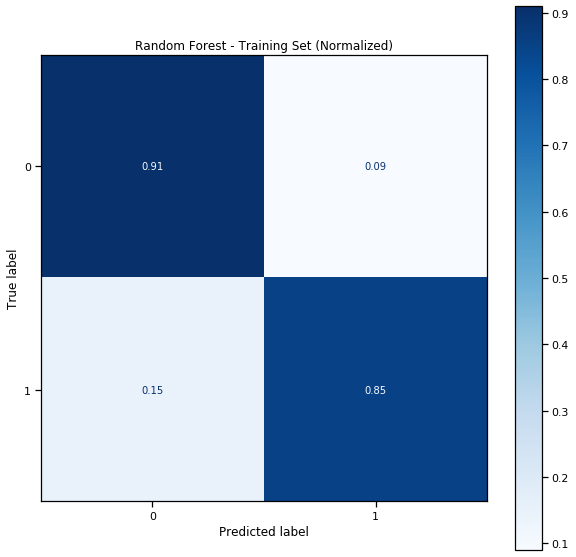

In [49]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth = 15)
clf_forest.fit(X_train_resampled, y_train_resampled)

y_hat_forest_train = clf_forest.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_forest_train))
show_confusion_matrix(clf_forest, X_train_resampled, y_train_resampled, title='Random Forest - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.87      0.60     34093
           1       0.97      0.81      0.89    186179

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.74    220272
weighted avg       0.89      0.82      0.84    220272



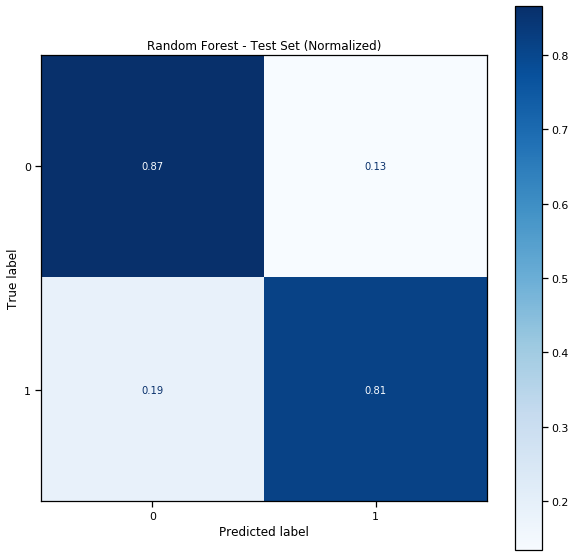

In [50]:
y_hat_forest_test = clf_forest.predict(X_test_numeric)
print(classification_report(y_test, y_hat_forest_test))
show_confusion_matrix(clf_forest, X_test_numeric, y_test, title='Random Forest - Test Set (Normalized)');

In [51]:
pickle.dump( clf_forest, open( "../models/save.forest", "wb" ) )



[Back to Top ↑](#top)

<a id='adaboost'></a>
### Adaboost

              precision    recall  f1-score   support

           0       0.83      0.85      0.84    103041
           1       0.85      0.83      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.84      0.84      0.84    206082
weighted avg       0.84      0.84      0.84    206082



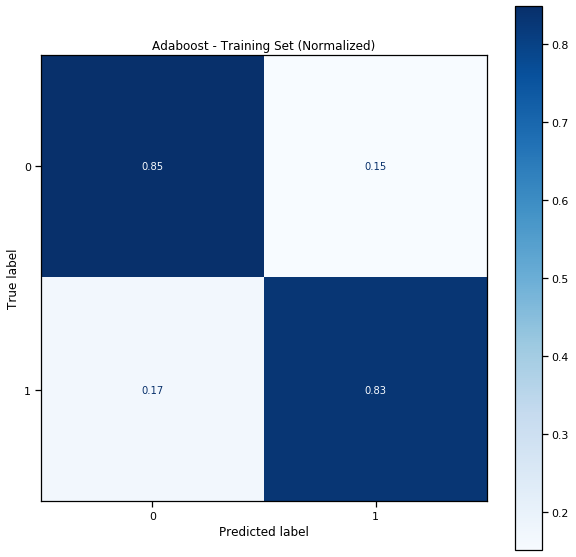

In [52]:
clf_ab = AdaBoostClassifier()
clf_ab.fit(X_train_resampled, y_train_resampled)

y_hat_ab_train = clf_ab.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_hat_ab_train))
show_confusion_matrix(clf_ab, X_train_resampled, y_train_resampled, title='Adaboost - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.48      0.84      0.61     34093
           1       0.97      0.83      0.89    186179

    accuracy                           0.83    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.83      0.85    220272



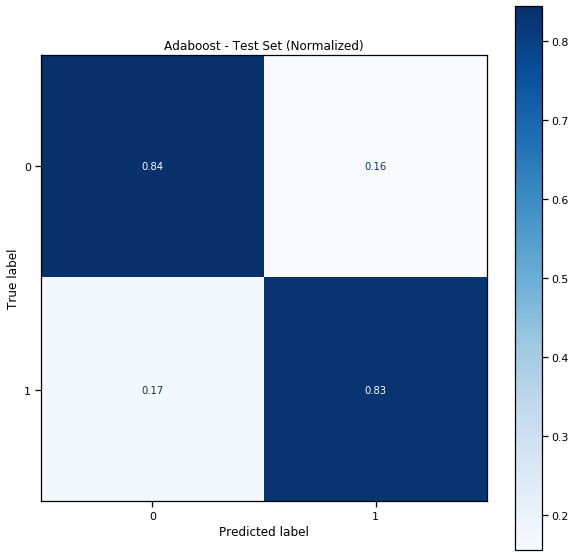

In [53]:
y_hat_ab_test = clf_ab.predict(X_test_numeric)
print(classification_report(y_test, y_hat_ab_test))
show_confusion_matrix(clf_ab, X_test_numeric, y_test, title='Adaboost - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='gradientboost'></a>
### Gradient Boost

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    103041
           1       0.86      0.82      0.84    103041

    accuracy                           0.84    206082
   macro avg       0.84      0.84      0.84    206082
weighted avg       0.84      0.84      0.84    206082



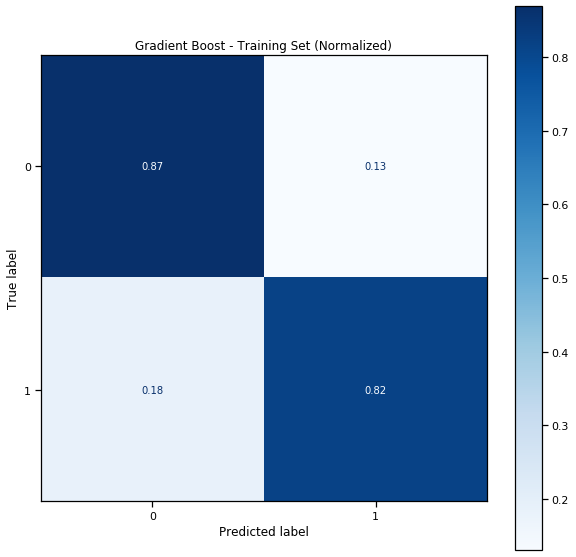

In [54]:
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_resampled, y_train_resampled)

y_hat_gb_train = clf_gb.predict(X_train_resampled)

print(classification_report(y_train_resampled, y_hat_gb_train))
show_confusion_matrix(clf_gb, X_train_resampled, y_train_resampled, title='Gradient Boost - Training Set (Normalized)');

              precision    recall  f1-score   support

           0       0.46      0.86      0.60     34093
           1       0.97      0.82      0.89    186179

    accuracy                           0.82    220272
   macro avg       0.72      0.84      0.75    220272
weighted avg       0.89      0.82      0.84    220272



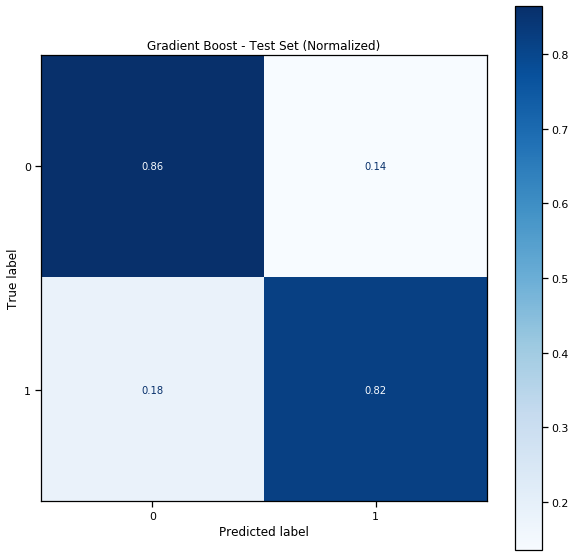

In [55]:
y_hat_gb_test = clf_gb.predict(X_test_numeric)
print(classification_report(y_test, y_hat_gb_test))
show_confusion_matrix(clf_gb, X_test_numeric, y_test, title='Gradient Boost - Test Set (Normalized)');



[Back to Top ↑](#top)

<a id='countvectorization'></a>
### Improved Results through Count Vectorization

In addition to our experiments with VADER, we also tried Count Vectorization, collecting the universal set of every word appearing in a review in our sample, and then transforming each review into a sparsely populated vector counting the number of times each word in the universal set occurs in that review so that we could use these vectors as predictors.

When run using a train-test split of all 960,000 reviews in our watches dataset, this method yielded better results in terms of generalizability, giving us 71% accuracy for Logistic Regression against both the training set and the test set. The downside was that it was incredibly slow and required a vast amount of memory, frequently forcing the kernel to restart before processing completed.

Results were not as strong when working with the much smaller 20,000-25,000 review random sample used for the rest of our analysis. Note the 20% score gap between training set and test set below, indicating a strong possibility of overfitting once again.

In [194]:
# X_train_vector, X_test_vector = get_vectorized_features(X_train, X_test)

In [196]:
# lr = LogisticRegression(penalty = 'l2')
# lr.fit(X_train_vector, y_train)

In [ ]:
lr.score(X_train_vector, y_train)

In [ ]:
lr.score(X_test_vector, y_test)

<a id='visualizations'></a>
### Visualizations

The visualizations below help to illustrate how the words and phrases in different classes of reviews differ from each other.

### Word Cloud for Positive Reviews

In [ ]:
class_c_review_wordcloud(df, 1)

### Word Cloud for Negative Reviews


In [ ]:
class_c_review_wordcloud(df, 0)


[Back to Top ↑](#top)

<a id='recommendations'></a>
### Recommendations & Next Steps

Through our analysis we've established the starting point for a framework by which the text of an Amazon review text can be used to predict the star rating associated with that review. Significant work remains in terms of improving the generalizability of these predictions so that they perform with a high degree of accuracy on new data outside of the training set. 

To accomplish this, we will continue to tune our models to find the optimal parameters and also seek to test additional models such as XGBoost, SVC, and Kernel Approximation. Given the promise shown by our Count Vectorization experiments, continuing to explore that method and other NLP techniques should be helpful in continuing to improve the performance of our models.

Further, we will seek to work with additional categories of data, and also explore the possibility of predicting only whether a review is "good" (4 or 5 stars) or "bad" (1 or 2 stars), which may be just as valuable or more valuable to a business as knowing the precise star rating.

Our eventual goal is that our process can be deployed on customer conversations anywhere, in any form, allowing businesses to proceed up with the appropriate automated customer service response (either internal to the business or directly to the customer), based on the class of the message and perhaps other contextual data that may provide further clues and insights.



[Back to Top ↑](#top)